# STATISTICAL LEARNING ASSIGNMENT 4

Chapter 8 Exercise 3: Consider the Gini index, classification error, and entropy in a simple classification setting with two classes.
Create a single plot that displays each of these quantities as a function of ˆpm1. The xaxis should display ˆpm1, ranging from 0 to 1, and the y-axis should
display the value of the Gini index, classification error, and entropy.

Classification Error:

E=1−maxk(p^mk)=1−max{p^m1,p^m2}

Gini Index:

G=∑k=1Kp^mk(1−p^mk)=p^m1(1−p^m1)+p^m2(1−p^m2)

Entropy:

D=−∑k=1Kp^mklog(p^mk)=−p^m1log(p^m1)−p^m2log(p^m2)


E=1−max{70,20}≈0.1429
G=70(1−70)+20(1−20)≈0.2449
D=−70log(70)−20log(20)≈0.4101

Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


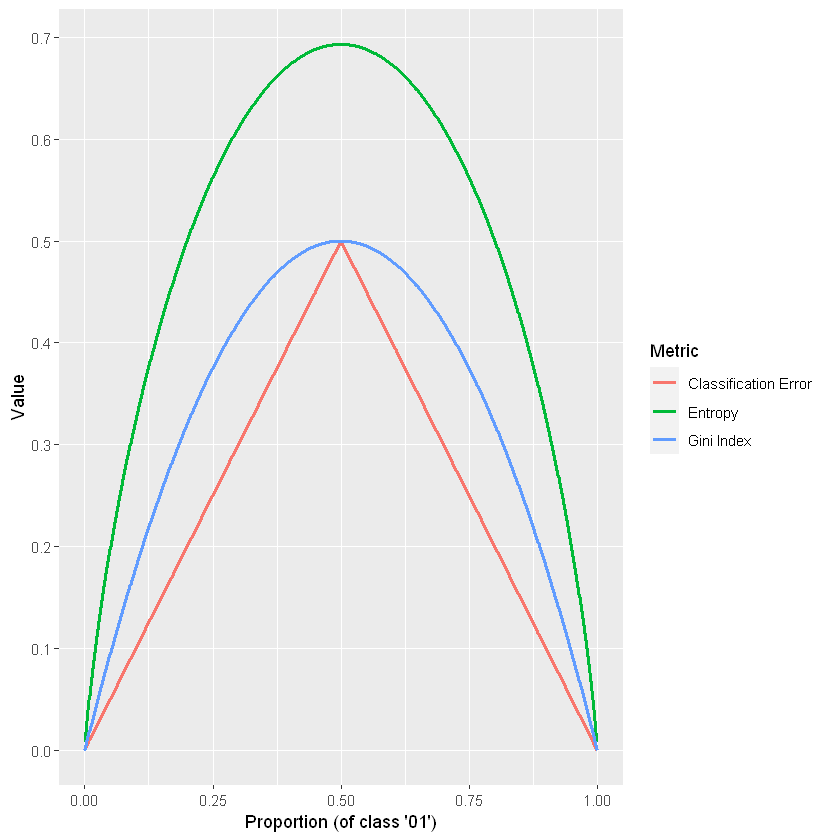

In [8]:
#Libraries for this exercise
library(ggplot2)
library(dplyr)
library(tidyr)

#Chapter 8 Exercise 3 Solution 

propclass01 <- seq(0, 1, 0.001)

propclass02 <- 1 - propclass01

classerror <- 1 - pmax(propclass01, propclass02)

giniindex <- propclass01*(1-propclass01) + propclass02*(1-propclass02)

entropy <- -propclass01*log(propclass01) - propclass02*log(propclass02)


data.frame(propclass01, propclass02, classerror, giniindex, entropy) %>%
  pivot_longer(cols = c(classerror, giniindex, entropy), names_to = "metric") %>%
  ggplot(aes(x = propclass01, y = value, col = factor(metric))) + 
  geom_line(size = 1) + 
  scale_y_continuous(breaks = seq(0, 1, 0.1), minor_breaks = NULL) + 
  scale_color_hue(labels = c("Classification Error", "Entropy", "Gini Index")) +
  labs(col = "Metric", 
       y = "Value", 
       x = "Proportion (of class '01')")


In [14]:
#Chapter 8 Exercise 5: Suppose we produce ten bootstrapped samples from a data set containing red and green classes.
probab <- c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)
#Number of 'Red' prediction
sum(probab >= 0.5) 
#Number of 'Green' prediction
sum(probab < 0.5) 
ifelse(sum(probab >= 0.5) > sum(probab < 0.5), "Red", "Green")
#Average P(Red)
mean(probab) 
ifelse(mean(probab) >= 0.5, "Red", "Green")

[1] 6

[1] 4

[1] "Red"

[1] 0.45

[1] "Green"

In [24]:
#Chapter 8 Exercise 8:Classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable
library(ISLR)
library(MASS)
library(tree)
data(Boston)

#Exercise 8A:Split the data set into a training set and a test set.
#This allows us to match the same train/test split
set.seed(2, sample.kind = "Rounding") 

trainind <- sample(1:nrow(Carseats), nrow(Carseats) / 2)

traindataset <- Carseats[trainind, ] 
testdataset <- Carseats[-trainind, ]

Warning message in set.seed(2, sample.kind = "Rounding"):
"non-uniform 'Rounding' sampler used"



Regression tree:
tree(formula = Sales ~ ., data = traindataset)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Income"      "CompPrice"  
[6] "Population"  "Advertising"
Number of terminal nodes:  17 
Residual mean deviance:  2.341 = 428.4 / 183 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.76700 -1.00900 -0.01558  0.00000  0.94900  3.58600 

[1] 4.844991

[1] 8.085056

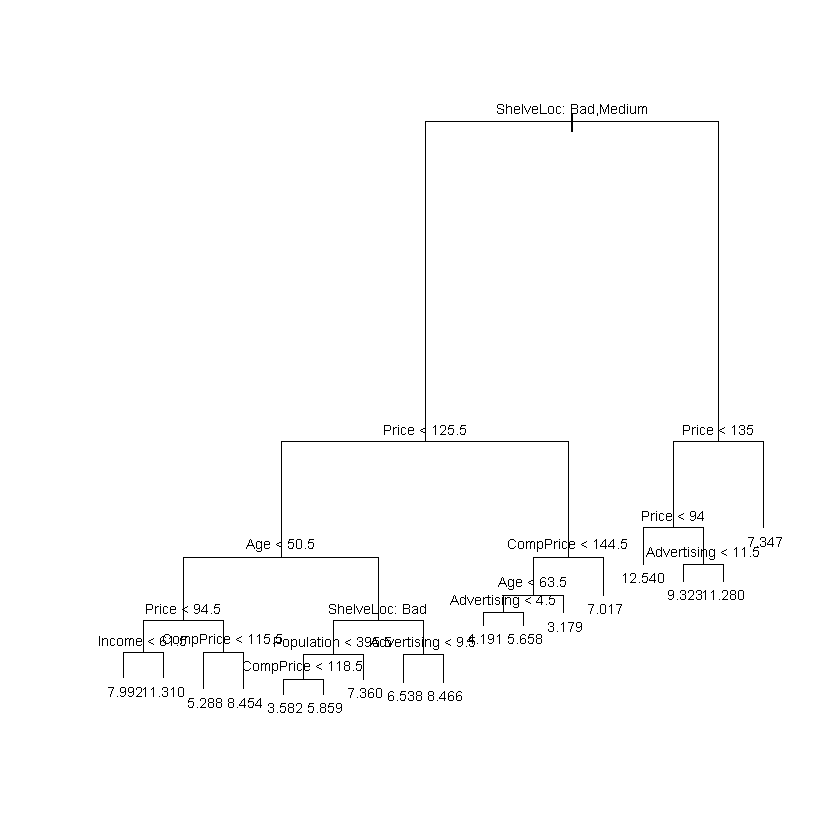

In [28]:
#Exercise 8B: Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?
treemodel <- tree(Sales ~ ., traindataset)

plot(treemodel)
text(treemodel, pretty = 0, cex = 0.7)

summary(treemodel)
testpred <- predict(treemodel, testdataset)
mean((testpred - testdataset$Sales)^2)

basetestpred <- mean(traindataset$Sales)
mean((basetestpred - testdataset$Sales)^2)
#Because ShelveLoc and Price appear at the top of the tree, we can conclude that they are the two most important factors in predicting car seat sales

[1] 4.844991

size,dev,k
<int>,<dbl>,<dbl>
17,996.5117,-Inf
16,998.3865,16.25730
15,1008.3807,19.34054
14,1032.8005,21.45248
13,1032.2548,22.09786
12,1124.1770,31.59872
11,1130.3090,32.10994
10,1125.5635,35.48396
9,1142.3155,42.57770


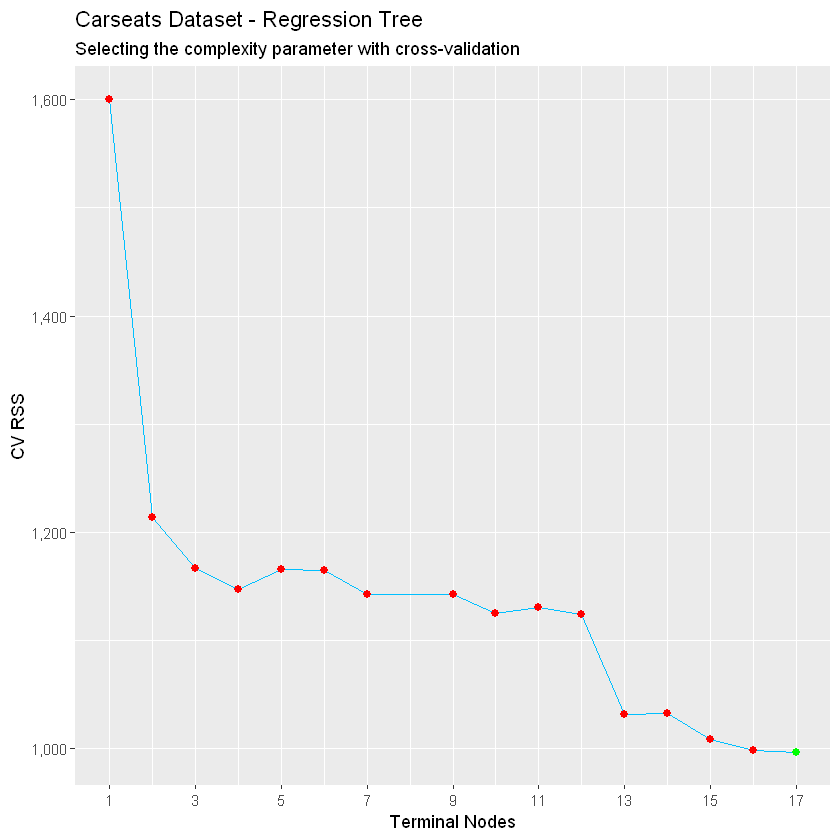

In [34]:
#Exercise 8C:Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE? 
set.seed(3)

cvtreemodel <- cv.tree(treemodel, K = 10)

data.frame(n_leaves = cvtreemodel$size,
           CVRSS = cvtreemodel$dev) %>%
  mutate(min_CVRSS = as.numeric(min(CVRSS) == CVRSS)) %>%
  ggplot(aes(x = n_leaves, y = CVRSS)) +
  geom_line(col = "deepskyblue") +
  geom_point(size = 2, aes(col = factor(min_CVRSS))) +
  scale_x_continuous(breaks = seq(1, 17, 2)) +
  scale_y_continuous(labels = scales::comma_format()) +
  scale_color_manual(values = c("red", "green")) +
  theme(legend.position = "none") +
  labs(title = "Carseats Dataset - Regression Tree",
       subtitle = "Selecting the complexity parameter with cross-validation",
       x = "Terminal Nodes",
       y = "CV RSS")

#We would select a smaller sub-tree, in this case the full tree with 17 terminal nodes is selected (best = 17)

prunedtreemodel <- prune.tree(treemodel, best = 17)
testpred <- predict(prunedtreemodel, testdataset)
mean((testpred - testdataset$Sales)^2)

data.frame(size = cvtreemodel$size, 
           dev = cvtreemodel$dev, 
           k = cvtreemodel$k)
#k seems to to be capable of handling both -Inf and 0 values, resulting in models with varying numbers of terminal nodes

In [41]:
#Exercise 8D:Use the bagging approach in order to analyze this data. What test MSE do you obtain?
#Libraries used for exercise
library(randomForest)
library(tibble)

set.seed(1)
baggedtreemodel <- randomForest(y = traindataset$Sales, 
                                   x = traindataset[ ,-1], 
                                   mtry = ncol(traindataset) - 1, 
                                   importance = T) 
#We now have 500 trees constructed from various bootstrap samples of the training dataset. The predictive power, on the other hand, has increased, with the test MSE decreasing by 50%.

testpred <- predict(baggedtreemodel, testdataset)
mean((testpred - testdataset$Sales)^2)

importance(baggedtreemodel) %>%
  as.data.frame() %>%
  rownames_to_column("varname") %>%
  arrange(desc(IncNodePurity))

#First criterion,  %IncMSE, is determined by calculating by measuring each tree's prediction error on the OOB portion of the data (for regression, the MSE). The OOB MSE is then re-evaluated after a predictor is scrambled (permuted). The difference in MSEs is averaged across all trees and normalized by the standard deviation of the differences.
#The second metric, IncNodePurity, represents the total decrease in node impurity as a result of splitting on that variable (averaged across all the trees). Gini and RSS are used to calculate node impurity for classification and regression, respectively.
#Whatever criterion is used, we can see that the most key variables for bagged trees are Price and ShelveLoc. This was also the conclusion reached after looking at the top splits of the single regression tree.

[1] 2.368674

varname,%IncMSE,IncNodePurity
<chr>,<dbl>,<dbl>
Price,55.76266629,493.804969
ShelveLoc,53.87451311,446.816951
CompPrice,25.47984338,173.982449
Age,12.07366106,117.502364
Advertising,13.97464644,96.929928
Income,1.72616791,71.465227
Population,1.01449985,68.297498
Education,0.08382003,37.513944
Urban,-3.06299457,6.909530


[1] 2.368674

varname,%IncMSE,IncNodePurity
<chr>,<dbl>,<dbl>
Price,55.76266629,493.804969
ShelveLoc,53.87451311,446.816951
CompPrice,25.47984338,173.982449
Age,12.07366106,117.502364
Advertising,13.97464644,96.929928
Income,1.72616791,71.465227
Population,1.01449985,68.297498
Education,0.08382003,37.513944
Urban,-3.06299457,6.909530


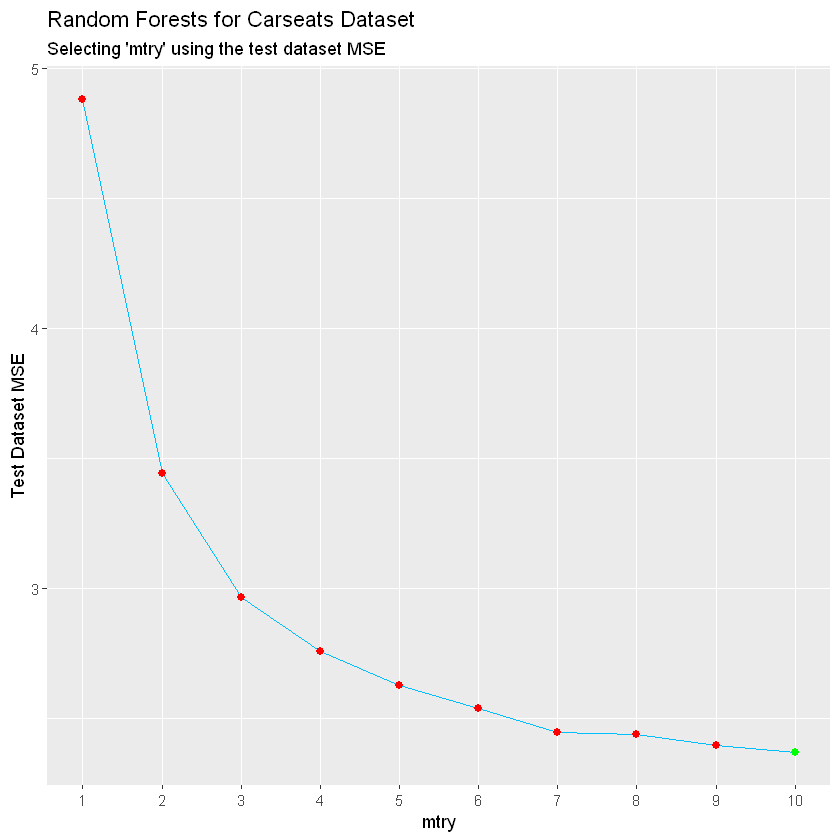

In [47]:
#Exercise 8E:Use random forests to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables aremost important
testMSE <- c()

i <- 1

for (Mtry in 1:10) {
  set.seed(1)
  
  rftemp <- randomForest(y = traindataset$Sales, 
                          x = traindataset[ ,-1], 
                          mtry = Mtry, 
                          importance = T)
  
  testpred <- predict(rftemp, testdataset)
  
  testMSE[i] <- mean((testpred - testdataset$Sales)^2)
  
  i <- i + 1
}

data.frame(mtry = 1:10, testMSE = testMSE) %>%
  mutate(min_testMSE = as.numeric(min(testMSE) == testMSE)) %>%
  ggplot(aes(x = mtry, y = testMSE)) +
  geom_line(col = "deepskyblue") +
  geom_point(size = 2, aes(col = factor(min_testMSE))) +
  scale_x_continuous(breaks = seq(1, 10), minor_breaks = NULL) +
  scale_color_manual(values = c("red", "green")) +
  theme(legend.position = "none") +
  labs(title = "Random Forests for Carseats Dataset",
       subtitle = "Selecting 'mtry' using the test dataset MSE",
       x = "mtry",
       y = "Test Dataset MSE")

#The ideal random forest model had an mtry of 10, which is the same as the bagged trees model.

tail(testMSE, 1)
importance(rftemp) %>%
  as.data.frame() %>%
  rownames_to_column("varname") %>%
  arrange(desc(IncNodePurity))

In [50]:
#Chapter 8 Exercise 9: This problem involves the OJ data set which is part of the ISLR package.
#Exercise 9A:Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations
str(OJ)

set.seed(5)

trainind <- sample(1:nrow(OJ), 800)

traindataset <- OJ[trainind, ]
testdataset <- OJ[-trainind, ]

'data.frame':	1070 obs. of  18 variables:
 $ Purchase      : Factor w/ 2 levels "CH","MM": 1 1 1 2 1 1 1 1 1 1 ...
 $ WeekofPurchase: num  237 239 245 227 228 230 232 234 235 238 ...
 $ StoreID       : num  1 1 1 1 7 7 7 7 7 7 ...
 $ PriceCH       : num  1.75 1.75 1.86 1.69 1.69 1.69 1.69 1.75 1.75 1.75 ...
 $ PriceMM       : num  1.99 1.99 2.09 1.69 1.69 1.99 1.99 1.99 1.99 1.99 ...
 $ DiscCH        : num  0 0 0.17 0 0 0 0 0 0 0 ...
 $ DiscMM        : num  0 0.3 0 0 0 0 0.4 0.4 0.4 0.4 ...
 $ SpecialCH     : num  0 0 0 0 0 0 1 1 0 0 ...
 $ SpecialMM     : num  0 1 0 0 0 1 1 0 0 0 ...
 $ LoyalCH       : num  0.5 0.6 0.68 0.4 0.957 ...
 $ SalePriceMM   : num  1.99 1.69 2.09 1.69 1.69 1.99 1.59 1.59 1.59 1.59 ...
 $ SalePriceCH   : num  1.75 1.75 1.69 1.69 1.69 1.69 1.69 1.75 1.75 1.75 ...
 $ PriceDiff     : num  0.24 -0.06 0.4 0 0 0.3 -0.1 -0.16 -0.16 -0.16 ...
 $ Store7        : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 2 2 2 2 2 ...
 $ PctDiscMM     : num  0 0.151 0 0 0 ...
 $ PctDiscC

In [68]:
#Exercise 9B:Fit a tree to the training data, with Purchase as the response and the other variables as predictors
treemod <- tree(Purchase ~ ., traindataset)
summary(treemod)

#The classification tree has 7 terminal nodes and an 18.38 percent training error rate.
#These were the olny variables used for the split: LoyalCH, PriceDiff,DiscCH 


Classification tree:
tree(formula = Purchase ~ ., data = traindataset)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff" "DiscCH"   
Number of terminal nodes:  7 
Residual mean deviance:  0.7786 = 617.4 / 793 
Misclassification error rate: 0.1838 = 147 / 800 

In [77]:
#install.packages('rpart')

glimpse(OJ)

Rows: 1,070
Columns: 18
$ Purchase       <fct> CH, CH, CH, MM, CH, CH, CH, CH, CH, CH, CH, CH, CH, CH,~
$ WeekofPurchase <dbl> 237, 239, 245, 227, 228, 230, 232, 234, 235, 238, 240, ~
$ StoreID        <dbl> 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 2, 2~
$ PriceCH        <dbl> 1.75, 1.75, 1.86, 1.69, 1.69, 1.69, 1.69, 1.75, 1.75, 1~
$ PriceMM        <dbl> 1.99, 1.99, 2.09, 1.69, 1.69, 1.99, 1.99, 1.99, 1.99, 1~
$ DiscCH         <dbl> 0.00, 0.00, 0.17, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0~
$ DiscMM         <dbl> 0.00, 0.30, 0.00, 0.00, 0.00, 0.00, 0.40, 0.40, 0.40, 0~
$ SpecialCH      <dbl> 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ SpecialMM      <dbl> 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0~
$ LoyalCH        <dbl> 0.500000, 0.600000, 0.680000, 0.400000, 0.956535, 0.965~
$ SalePriceMM    <dbl> 1.99, 1.69, 2.09, 1.69, 1.69, 1.99, 1.59, 1.59, 1.59, 1~
$ SalePriceCH    <dbl> 1.75, 1.75, 1.69, 1.69, 1.69, 1.69, 1.69, 1.75, 1.75, 1~
$ PriceDiff     

In [80]:
#Exercise 9C:Type in the name of the tree object in order to get a detailed text output
#For the root node: 1) root 800 1064.00 CH ( 0.61750 0.38250 )
#That alone implies that there are 800 observations at the root node, the deviance is 1064.00, the overall prediction is CH, and the split is 61.75 percent CH vs 38.25 percent MM.
#We can see that three splits occur from the root node to produce the terminal node (labeled 11):
#LoyalCH = 0.5036 
#LoyalCH = 0.142213 
#PriceDiff = 0.235 
library(rpart)
library(MASS)
treemod

traindataset %>%
  filter(LoyalCH < 0.5036, 
         LoyalCH > 0.142213, 
         PriceDiff > 0.235) %>%
  select(Purchase) %>% 
  table()

-2 * (68 * log(68/118) + 50 * log(50/118))

ERROR while rich displaying an object: Error in cat(x, ..., sep = sep): argument 1 (type 'list') cannot be handled by 'cat'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. r

ERROR: Error in select(., traindataset$Purchase): unused argument (traindataset$Purchase)


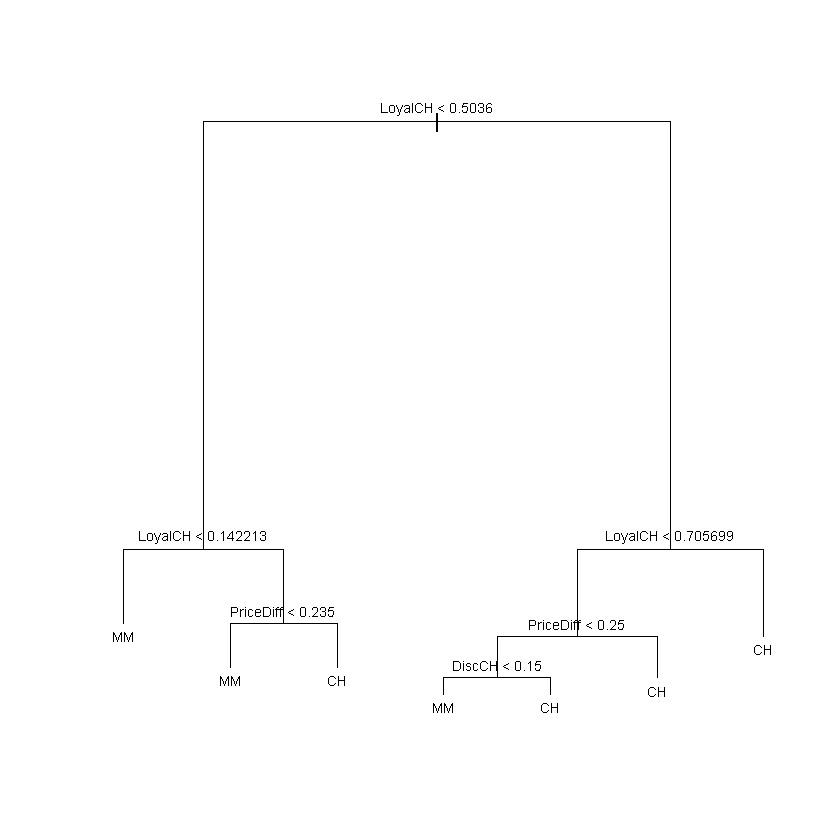

In [78]:
#Exercise 9D:Create a plot of the tree, and interpret the results
#LoyalCH is probably the most significant variable (the top three nodes are all split on it), followed by PriceDiff and DiscCH. Node 11 is the third terminal node, as we can see.
#Because LoyalCH is a 0 to 1 scale, the first split sends those who are less loyal to Citrus Hill (CH) orange juice to the left and those who are more loyal to the right.
plot(treemod)
text(treemod, pretty = 0, cex = 0.7)

#Those with the lowest Citrus Hill loyalty (LoyalCH 0.142213) were predicted to purchase Minute Maid (MM), which is not surprising. 
#Those who were possibly a bit more loyal to CH (0.142213 LoyalCH 0.5036) would mostly buy MM as it is not too even more expensive (PriceDiff 0.235), however if the price difference is large enough (CH was much cheaper), they might buy CH.
#The others from the far right terminal node are the most loyal to CH (LoyalCH > 0.705699), so it's no surprise that this is their predicted purchase. 
#Those with lower brand loyalty (0.5036 LoyalCH 0.705699) would still buy CH if it was significantly cheaper (PriceDiff > 0.25), or if it wasn't but was sufficiently discounted (PriceDiff > 0.25 & DiscCH > 0.15).
#This seems to be a more good description, but it can be encapsulated at a far more greater level as follows: people are sticking with the brand they are most loyal to, but there are some special cases based on discounts and price increases relative to one another that can sway people away from their usual brand loyalties.

In [83]:
#Exercise 9E:Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?
testpred <- predict(treemod, testdataset, type = "class")
table(testpred, testactual = testdataset$Purchase)

1 - round(mean(testpred == testdataset$Purchase), 3)
1 - round(mean(testdataset$Purchase == "CH"), 3)
#Because CH was the most common orange juice in train,this is the baseline classifier which predicted CH for all test observations.

        testactual
testpred  CH  MM
      CH 125  32
      MM  34  79

[1] 0.244

[1] 0.411

In [84]:
#Exercise 9F:Apply the cv.tree() function to the training set in order to determine the optimal tree size
set.seed(2)

cvtreemodel <- cv.tree(treemodel, K = 10, FUN = prune.misclass)
cvtreemodel

$size
[1] 7 4 2 1

$dev
[1] 164 164 177 298

$k
[1] -Inf    1    9  138

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

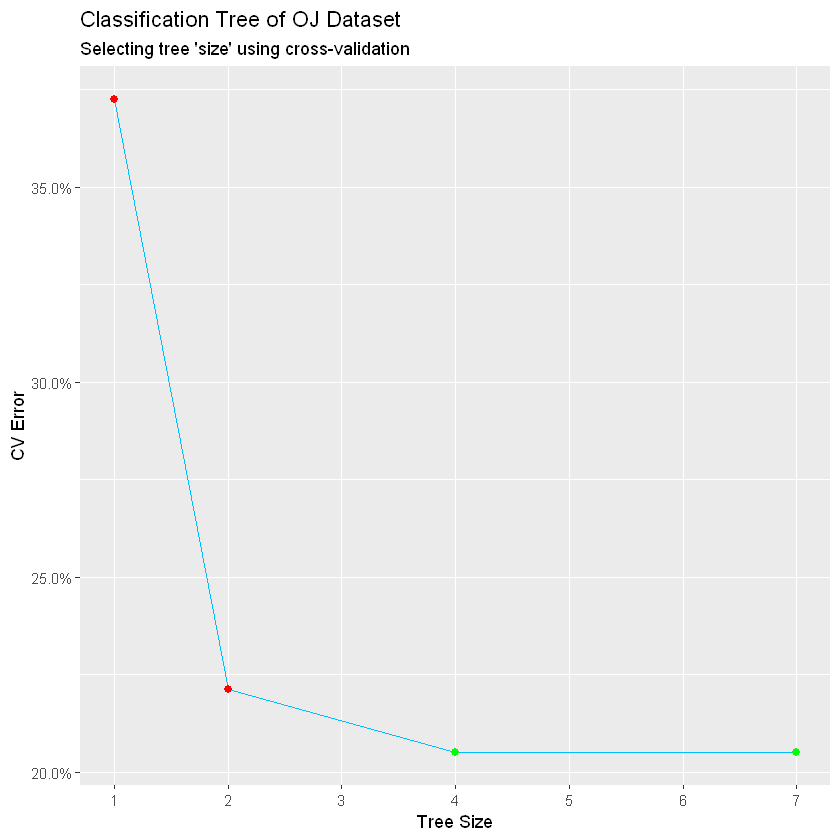

In [85]:
#Exercise 9G: Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.
data.frame(size = cvtreemodel$size, CVError = cvtreemodel$dev / nrow(traindataset)) %>%
  mutate(min_CVError = as.numeric(min(CVError) == CVError)) %>%
  ggplot(aes(x = size, y = CVError)) +
  geom_line(col = "deepskyblue") +
  geom_point(size = 2, aes(col = factor(min_CVError))) +
  scale_x_continuous(breaks = seq(1, 7), minor_breaks = NULL) +
  scale_y_continuous(labels = scales::percent_format()) +
  scale_color_manual(values = c("red", "green")) +
  theme(legend.position = "none") +
  labs(title = "Classification Tree of OJ Dataset",
       subtitle = "Selecting tree 'size' using cross-validation",
       x = "Tree Size",
       y = "CV Error")

Exercise 9H:Which tree size corresponds to the lowest cross-validated classification error rate?
Trees of sizes 4 and 7 have the same cross-validation error in the sequential manner of trees generated. It makes sense to go with the linear approach with four terminal nodes in this case.

In [88]:
#Exercise 9I:Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.
pruned_treemodel <- prune.tree(treemod, best = 4)
pruned_treemodel

ERROR while rich displaying an object: Error in cat(x, ..., sep = sep): argument 1 (type 'list') cannot be handled by 'cat'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. r

In [90]:
#Exercise 9J:Compare the training error rates between the pruned and unpruned trees. Which is higher?
mean(predict(treemodel, type = "class") != traindataset$Purchase)
mean(predict(pruned_treemodel, type = "class") != traindataset$Purchase)
#The pruned is higher

[1] 0.18375

[1] 0.21

In [114]:
#Exercise 9K:Compare the test error rates between the pruned and unpruned trees. Which is higher?
round(mean(predict(treemodel, type = "class", newdata = testdataset) != testdataset$Purchase), 3)
round(mean(predict(pruned_treemodel, type = "class", newdata = testdataset) != testdataset$Purchase), 3)

#The unpruned tree model is better

[1] 0.244

[1] 0.17

'data.frame':	322 obs. of  20 variables:
 $ AtBat    : int  293 315 479 496 321 594 185 298 323 401 ...
 $ Hits     : int  66 81 130 141 87 169 37 73 81 92 ...
 $ HmRun    : int  1 7 18 20 10 4 1 0 6 17 ...
 $ Runs     : int  30 24 66 65 39 74 23 24 26 49 ...
 $ RBI      : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Walks    : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Years    : int  1 14 3 11 2 11 2 3 2 13 ...
 $ CAtBat   : int  293 3449 1624 5628 396 4408 214 509 341 5206 ...
 $ CHits    : int  66 835 457 1575 101 1133 42 108 86 1332 ...
 $ CHmRun   : int  1 69 63 225 12 19 1 0 6 253 ...
 $ CRuns    : int  30 321 224 828 48 501 30 41 32 784 ...
 $ CRBI     : int  29 414 266 838 46 336 9 37 34 890 ...
 $ CWalks   : int  14 375 263 354 33 194 24 12 8 866 ...
 $ League   : Factor w/ 2 levels "A","N": 1 2 1 2 2 1 2 1 2 1 ...
 $ Division : Factor w/ 2 levels "E","W": 1 2 2 1 1 2 1 2 2 1 ...
 $ PutOuts  : int  446 632 880 200 805 282 76 121 143 0 ...
 $ Assists  : int  33 43 82 11 40 421 127 28

[1] 59

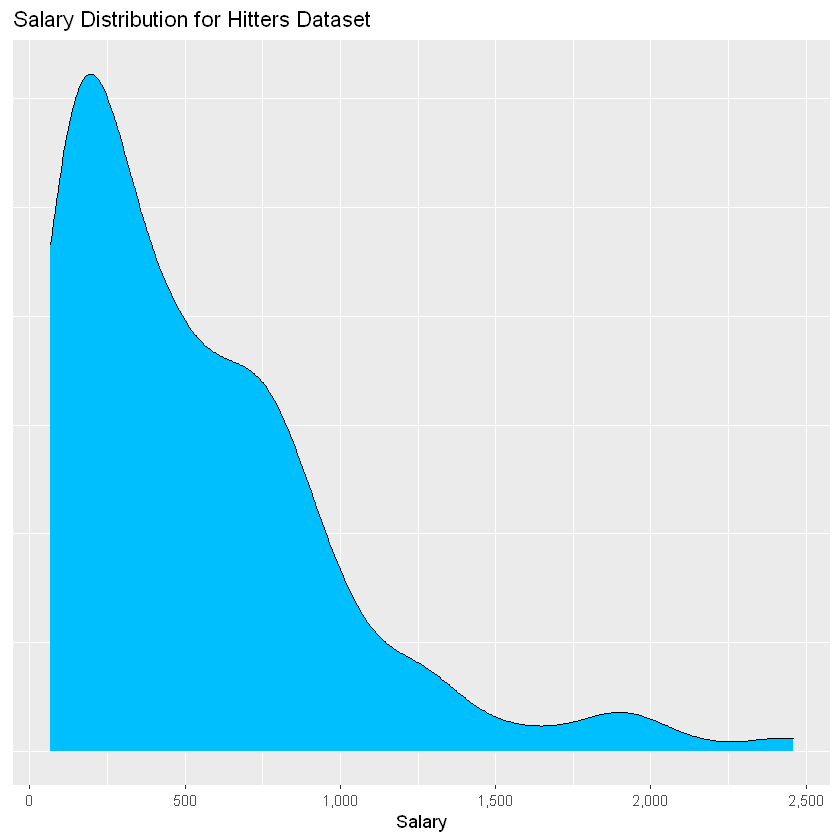

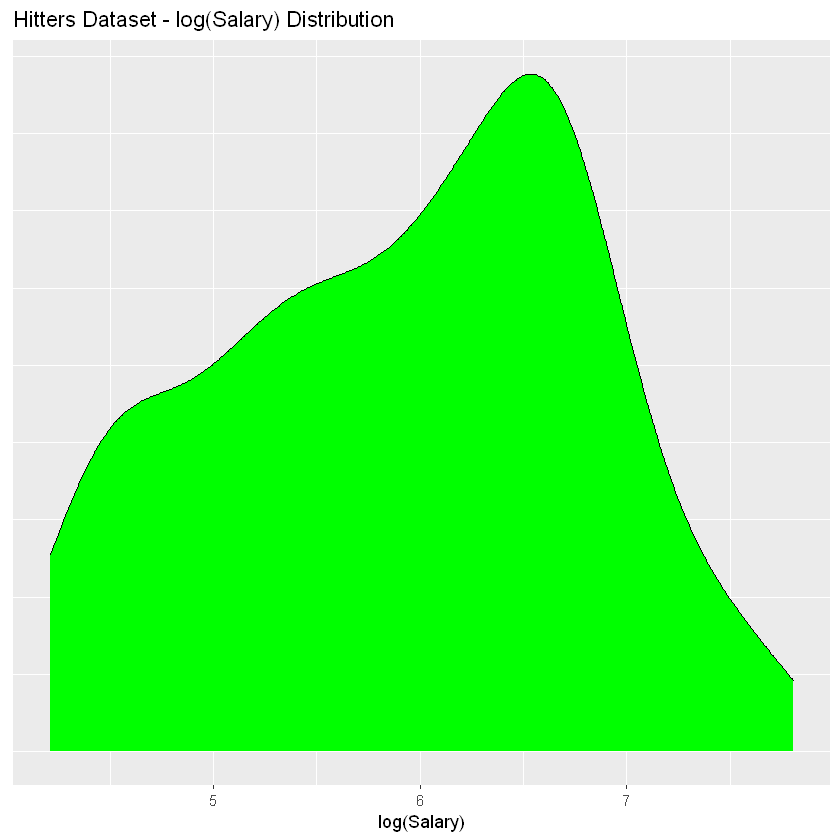

In [96]:
#Chapter 8 Exercise 10:We now use boosting to predict Salary in the Hitters data set.
#Exercise 10A:Remove the observations for whom the salary information is unknown, and then log-transform the salaries.
str(Hitters)
sum(is.na(Hitters$Salary))

HittersnotNA <- Hitters[!is.na(Hitters$Salary), ]
HittersnotNA$logSalary <- log(HittersnotNA$Salary)

ggplot(HittersnotNA, aes(x = Salary)) + 
  geom_density(fill = "deepskyblue") + 
  scale_x_continuous(labels = scales::comma_format()) +
  theme(axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.title.y = element_blank()) + 
  labs(title = "Salary Distribution for Hitters Dataset", 
       x = "Salary")

ggplot(HittersnotNA, aes(x = logSalary)) + 
  geom_density(fill = "green") + 
  theme(axis.text.y = element_blank(), 
        axis.ticks.y = element_blank(), 
        axis.title.y = element_blank()) + 
  labs(title = "log(Salary) Distribution of Hitters Dataset", 
       x = "log(Salary)")

In [117]:
#Exercise 10B:Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations
traindata <- HittersnotNA[1:200, ]
testdata <- HittersnotNA[201:nrow(HittersnotNA), ]


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

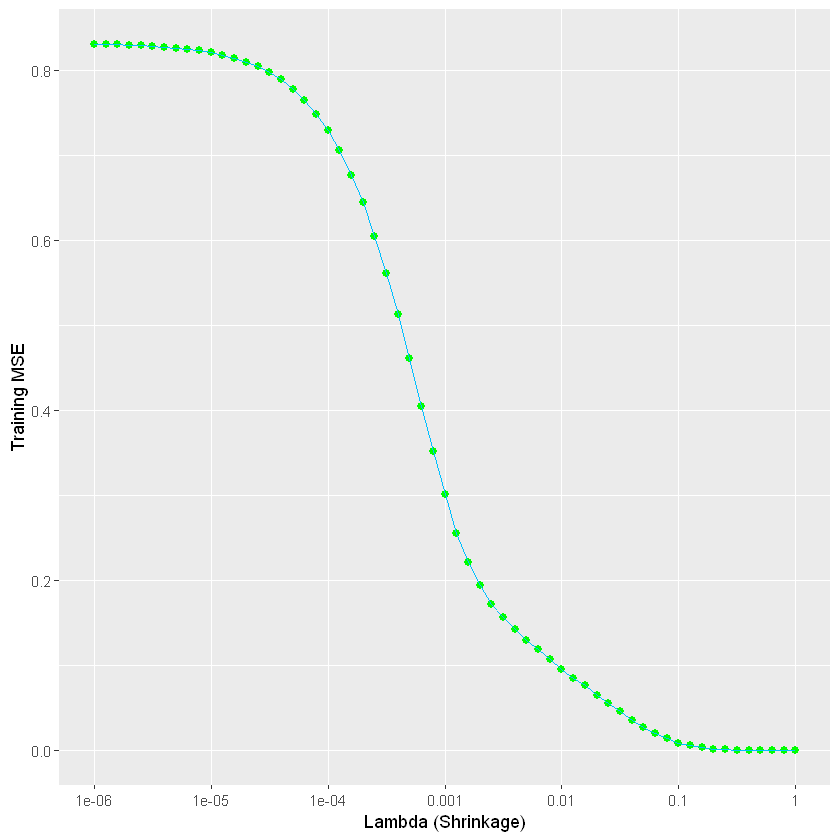

In [103]:
#Exercise 10C:Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis
library(gbm)

lambda_seq <- 10^seq(-6, 0, 0.1)

set.seed(1)

trainMSE <- c()
testMSE <- c()

for (i in 1:length(lambda_seq)) {
  boostTEMP <- gbm(logSalary ~ . - Salary, 
                    data = traindata, 
                    distribution = "gaussian", 
                    n.trees = 1000, 
                    interaction.depth = 2, 
                    shrinkage = lambda_seq[i])
  
  trainMSE[i] <- mean((predict(boostTEMP, traindata, n.trees = 1000) - traindata$logSalary)^2)
  
  testMSE[i] <- mean((predict(boostTEMP, testdata, n.trees = 1000) - testdata$logSalary)^2)
}

data.frame(lambda = lambda_seq, trainMSE) %>%
  ggplot(aes(x = lambda, y = trainMSE)) + 
  geom_point(size = 2, col = "green") + 
  geom_line(col = "deepskyblue") + 
  scale_x_continuous(trans = 'log10', breaks = 10^seq(-6, 0), labels = 10^seq(-6, 0), minor_breaks = NULL) + 
  labs(x = "Lambda (Shrinkage)", 
       y = "Training MSE")

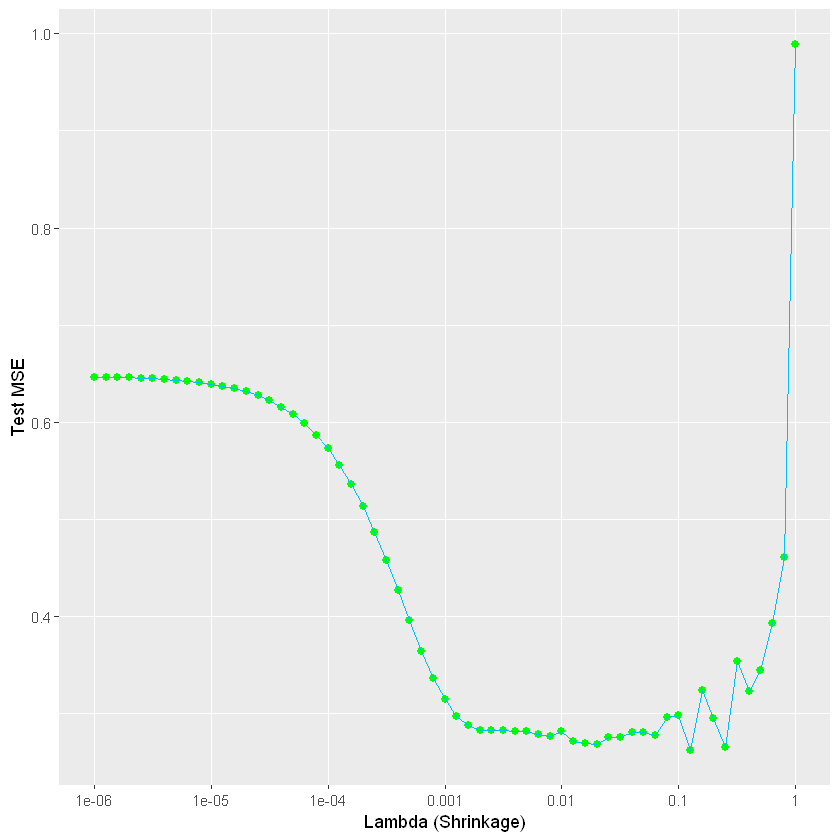

In [104]:
#Exercise 10D:Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.
data.frame(lambda = lambda_seq, testMSE) %>%
  ggplot(aes(x = lambda, y = testMSE)) + 
  geom_point(size = 2, col = "green") + 
  geom_line(col = "deepskyblue") + 
  scale_x_continuous(trans = 'log10', breaks = 10^seq(-6, 0), labels = 10^seq(-6, 0), minor_breaks = NULL) + 
  labs(x = "Lambda (Shrinkage)", 
       y = "Test MSE")

In [124]:
#Exercise 10E:Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6
#Boosting: Keeping the constants n.trees = 1500, interaction.depth = 4, and n.minobsinnode = 10.
library(caret)
library(AUC)
library(caret)
library(e1071)
library(reprex)
library(mlbench)
library(Metrics)

fit <- lm(Salary ~ ., data = traindata)
pred <- predict(fit, testdata)
mean((pred - testdata$Salary)^2)

x <- model.matrix(Salary ~ ., data = traindata)
x.testdata <- model.matrix(Salary ~ ., data = testdata)
y <- traindata$Salary
fit01 <- glmnet(x, y, alpha = 0)
pred01 <- predict(fit01, s = 0.01, newx = x.testdata)
mean((pred01 - testdata$Salary)^2)



[1] 25671.77

[1] 22435.18

,var,rel.inf
,<chr>,<dbl>
logSalary,logSalary,82.88056138
CHmRun,CHmRun,4.24863989
Walks,Walks,1.51287701
PutOuts,PutOuts,1.41407304
RBI,RBI,1.23999650
CWalks,CWalks,1.14434897
Hits,Hits,1.08418210
CAtBat,CAtBat,1.05502649
Runs,Runs,0.97506291


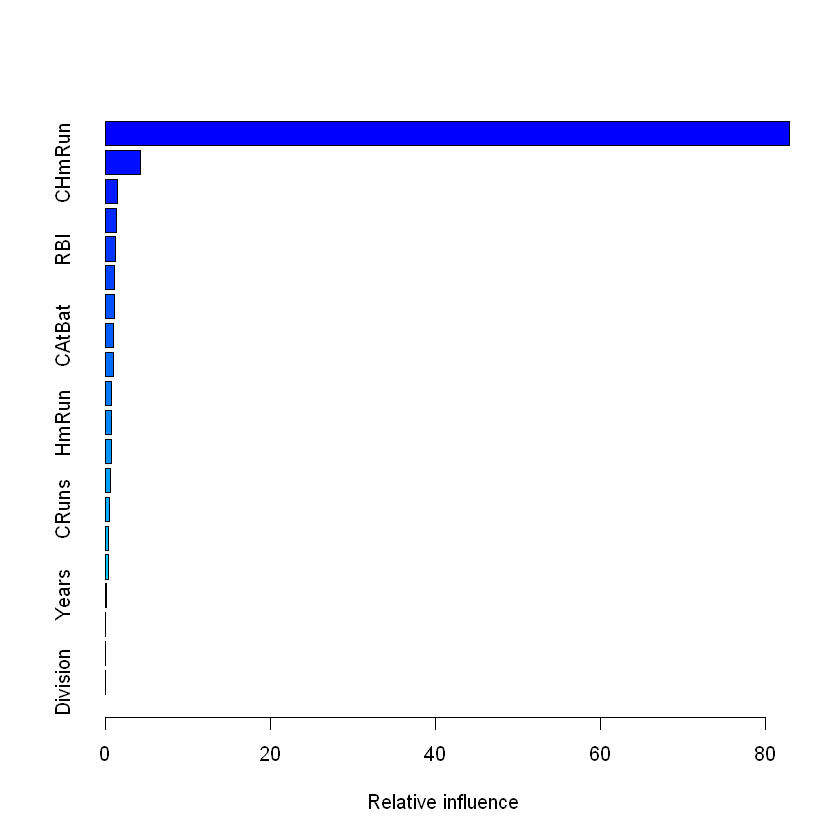

In [132]:
#Exercise 10F: Which variables appear to be the most important predictors in the boosted model ?
library(glmnet)

boosthit <- gbm(Salary ~ ., data = traindata, distribution = "gaussian", n.trees = 1000, shrinkage = lambda_seq[which.min(testMSE)])
summary(boosthit)

In [133]:
#Exercise 10G:Now apply bagging to the training set. What is the test set MSE for this approach ?
set.seed(1)
baghit <- randomForest(Salary ~ ., data = traindata, mtry = 19, ntree = 500)
yhatbag <- predict(baghit, newdata = testdata)
mean((yhatbag - testdata$Salary)^2)



[1] 320.5728